# Business Understanding

## Project Domain

Domain: Automotive & Machine Learning
Sub-Domain: Vehicle Identification and Classification using Data-Driven Models

Proyek ini berada dalam ranah industri otomotif dan teknologi machine learning, dengan fokus pada pengenalan nama mobil (vehicle name classification) berdasarkan atribut-atribut kendaraan yang tersedia dalam dataset, seperti jenis bahan bakar, tipe transmisi, kapasitas mesin, dan lainnya. Teknologi ini dapat diaplikasikan dalam sistem manajemen inventaris kendaraan, showroom digital, platform jual-beli mobil, serta inspeksi otomatis.

## Problem Statements

Dalam industri otomotif, identifikasi nama kendaraan dari sekumpulan atribut teknis secara manual memakan waktu dan rentan terhadap kesalahan.

Banyak platform online atau sistem showroom yang belum mengadopsi otomatisasi untuk klasifikasi nama mobil berdasarkan spesifikasi, padahal ini penting untuk efisiensi dan akurasi informasi.

Pengguna seringkali tidak mengetahui secara pasti nama mobil hanya berdasarkan fitur-fitur umum seperti bahan bakar, transmisi, dan ukuran mesin.

## Goals

Membangun model machine learning yang dapat secara akurat memprediksi nama mobil berdasarkan input fitur-fitur seperti fuel type, transmission, engine size, dan fitur lainnya.

Mempermudah proses identifikasi kendaraan baik untuk keperluan penjualan, pencatatan, maupun klasifikasi produk.

Memberikan sistem yang dapat diintegrasikan ke dalam aplikasi berbasis Android/Web untuk penggunaan oleh dealer, showroom, atau pengguna umum.

## Solution Statements

Menggunakan teknik supervised learning (seperti Random Forest, XGBoost, atau Neural Networks) untuk melakukan klasifikasi nama mobil dari fitur-fitur kendaraan.

Melakukan preprocessing data (pembersihan, encoding, normalisasi) terhadap dataset processes2.csv agar siap untuk pelatihan model.

Melatih dan mengevaluasi model menggunakan metrik akurasi, precision, recall, dan F1-score guna memastikan performa optimal.

Mengimplementasikan model dalam bentuk aplikasi yang memungkinkan pengguna menginput atribut kendaraan dan mendapatkan prediksi nama mobil secara real-time.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d jacksondivakarr/sample34

Dataset URL: https://www.kaggle.com/datasets/jacksondivakarr/sample34
License(s): apache-2.0
sample34.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir sample34
!unzip sample34.zip -d sample34
!ls sample34

mkdir: cannot create directory ‘sample34’: File exists
Archive:  sample34.zip
replace sample34/processes2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: processes2.csv


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('sample34/processes2.csv')

In [ ]:
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


## Exploratory Data Analysis

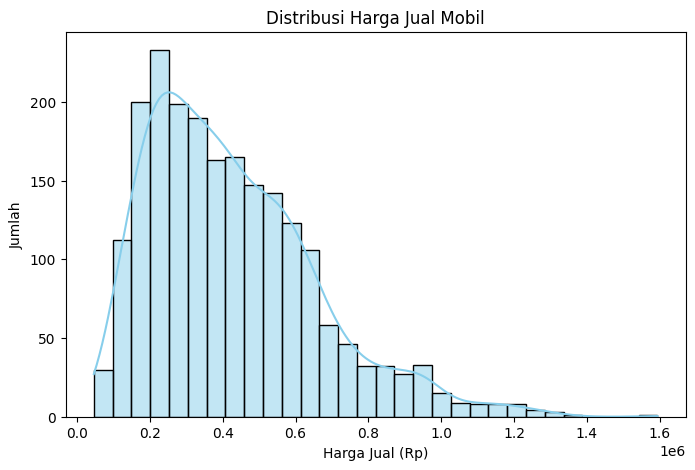

In [ ]:
# Plot: Distribusi Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Harga Jual Mobil')
plt.xlabel('Harga Jual (Rp)')
plt.ylabel('Jumlah')
plt.show()

/tmp/ipython-input-93-2412173336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fuel', palette='pastel')


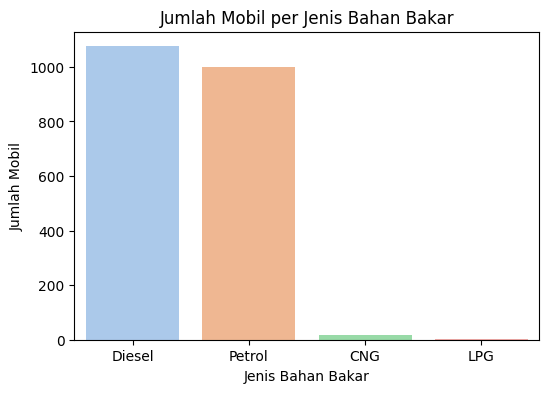

In [ ]:
# Plot: Fuel Type Count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fuel', palette='pastel')
plt.title('Jumlah Mobil per Jenis Bahan Bakar')
plt.xlabel('Jenis Bahan Bakar')
plt.ylabel('Jumlah Mobil')
plt.show()

/tmp/ipython-input-94-1363852536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set2')


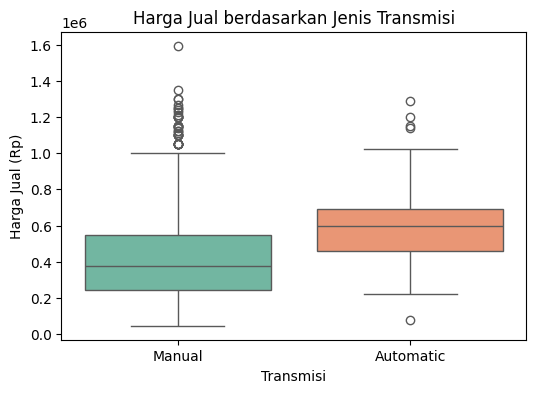

In [ ]:
# Plot: Transmission Type vs Selling Price
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set2')
plt.title('Harga Jual berdasarkan Jenis Transmisi')
plt.xlabel('Transmisi')
plt.ylabel('Harga Jual (Rp)')
plt.show()


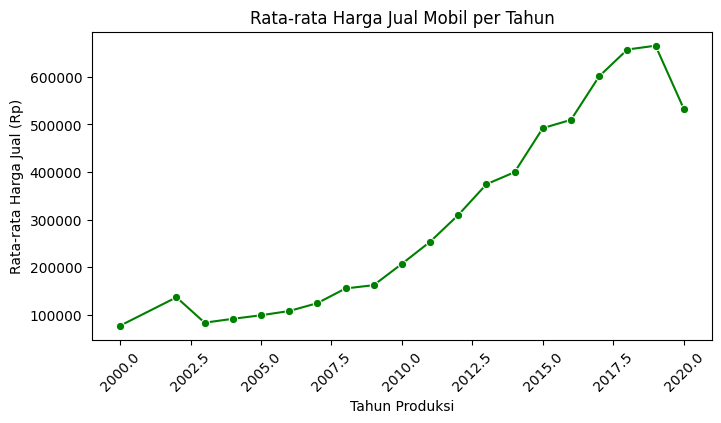

In [ ]:
# Hitung rata-rata harga jual per tahun
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Plot: Average Price by Year
plt.figure(figsize=(8, 4))
sns.lineplot(data=avg_price_by_year, x='year', y='selling_price', marker='o', color='green')
plt.title('Rata-rata Harga Jual Mobil per Tahun')
plt.xlabel('Tahun Produksi')
plt.ylabel('Rata-rata Harga Jual (Rp)')
plt.xticks(rotation=45)
plt.show()

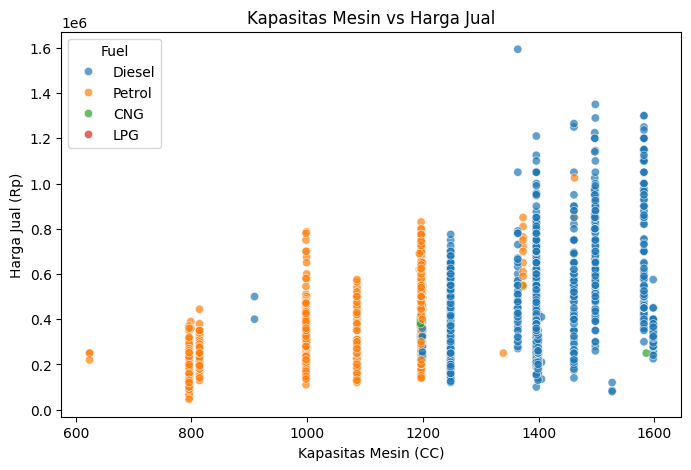

In [ ]:
# Plot: Engine Capacity vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Engine (CC)', y='selling_price', hue='fuel', alpha=0.7)
plt.title('Kapasitas Mesin vs Harga Jual')
plt.xlabel('Kapasitas Mesin (CC)')
plt.ylabel('Harga Jual (Rp)')
plt.legend(title='Fuel')
plt.show()

# Data Preparation

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'km_driven', 'seller_type', 'owner', 'max_power (in bph)', 'Mileage Unit', 'Mileage'])

In [ ]:
df_encode = pd.DataFrame(df)

In [ ]:
df_encode['fuel'] = df_encode['fuel'].map({'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3})

In [ ]:
df_encode['transmission'] = df_encode['transmission'].map({'Manual':0, 'Automatic':1})

In [ ]:
df_encode.head()

,name,year,selling_price,fuel,transmission,seats,Engine (CC)
0,Maruti,2014,450000,0,0,5,1248
1,Hyundai,2010,225000,0,0,5,1396
2,Hyundai,2017,440000,1,0,5,1197
3,Toyota,2011,350000,0,0,5,1364
4,Ford,2013,200000,0,0,5,1399


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
fuel,0
transmission,0
seats,0
Engine (CC),0


In [ ]:
X = df.drop(columns=["name"])
y = df["name"]

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_encode.drop(columns=["name"]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(1500, activation="relu"),
    layers.Dense(750, activation="relu"),
    layers.Dense(325, activation="relu"),
    layers.Dense(155, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 1500)           │        10,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 750)            │     1,125,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 325)            │       244,075 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 155)            │        50,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,415 (5.46 MB)

 Trainable params: 1,432,415 (5.46 MB)

 Non-trainable params: 0 (0.00 B)

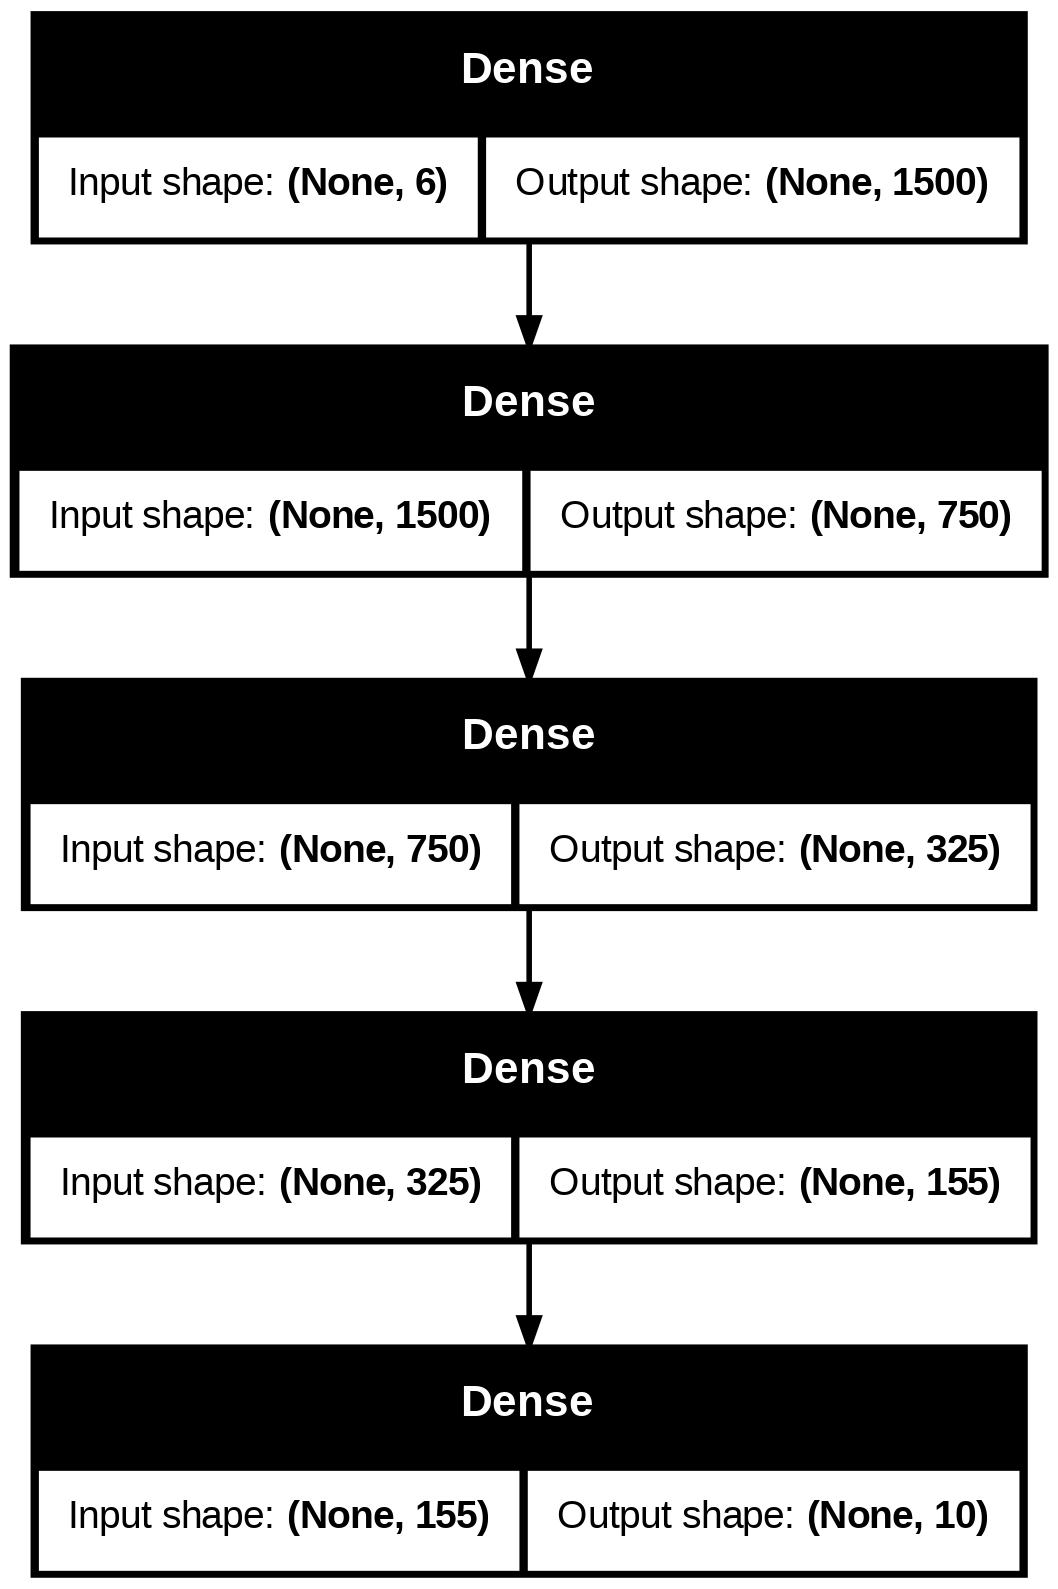

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4511 - loss: 1.7838 - val_accuracy: 0.4792 - val_loss: 1.4012
Epoch 2/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5318 - loss: 1.3892 - val_accuracy: 0.5595 - val_loss: 1.3063
Epoch 3/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5936 - loss: 1.2602 - val_accuracy: 0.5595 - val_loss: 1.2083
Epoch 4/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5940 - loss: 1.1748 - val_accuracy: 0.5446 - val_loss: 1.2240
Epoch 5/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6019 - loss: 1.1287 - val_accuracy: 0.5506 - val_loss: 1.1062
Epoch 6/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6214 - loss: 1.0070 - val_accuracy: 0.5982 - val_loss: 1.1034
Epoch 7/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6120 - loss: 1.0479 - val_accuracy: 0.6369 - val_loss: 1.0084
Epoch 8/250
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6259 - loss: 0.9518 - val_accuracy: 0.6726 - 

# Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8386 - loss: 0.5870
Akurasi Model: 0.8449
Loss Model: 0.5341


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

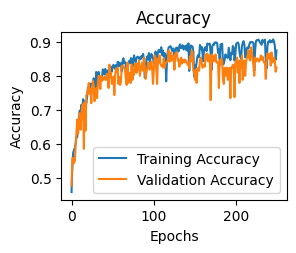

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

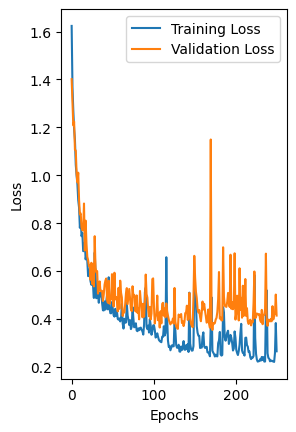

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


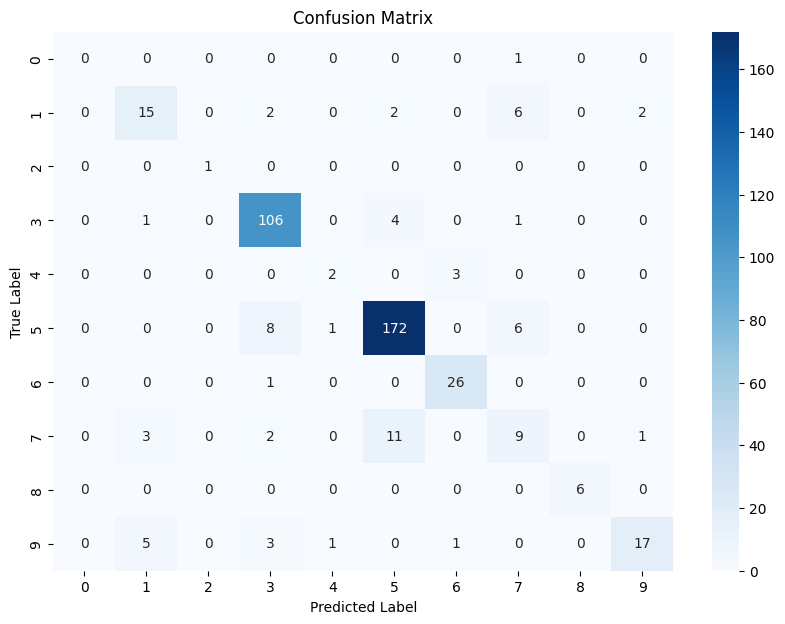

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.56      0.59        27
           2       1.00      1.00      1.00         1
           3       0.87      0.95      0.91       112
           4       0.50      0.40      0.44         5
           5       0.91      0.92      0.91       187
           6       0.87      0.96      0.91        27
           7       0.39      0.35      0.37        26
           8       1.00      1.00      1.00         6
           9       0.85      0.63      0.72        27

    accuracy                           0.84       419
   macro avg       0.70      0.68      0.69       419
weighted avg       0.84      0.84      0.84       419



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [ ]:
df_encode.head()

,name,year,selling_price,fuel,transmission,seats,Engine (CC)
0,Maruti,2014,450000,0,0,5,1248
1,Hyundai,2010,225000,0,0,5,1396
2,Hyundai,2017,440000,1,0,5,1197
3,Toyota,2011,350000,0,0,5,1364
4,Ford,2013,200000,0,0,5,1399


In [ ]:
sample_input = np.array([[2014, 450000, 0, 0, 5,	1248]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Mobil yang anda cari adalah: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Mobil yang anda cari adalah: Maruti


## Save Model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('car_prediction.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp4mtwzs48'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_42')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139640043677328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640043679824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640043682320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640043681936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640043679056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640044049552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640044048208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640044047056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640044048400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139640044052240: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']